In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as const
import astropy.units as u
plt.rcParams['font.size'] = 25


In [16]:
dataframe = pd.read_csv('run2.csv')
dataframe

,Temperature (K),B-Field (Gauss),sample I AB,sample I AD,sample I AC,sample I BD,sample I -AB,sample I -AD,sample I -AC,sample I -BD,Voltage DC,Voltage BC,Voltage BD,Voltage AC,Voltage -DC,Voltage -BC,Voltage -BD,Voltage -AC
0,96.060,-4605.000000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,0.002541,0.002909,0.009702,0.009035,-0.002411,-0.003539,-0.010889,-0.009653
1,97.355,-30.290001,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,0.001743,0.001734,-0.000153,-0.000542,-0.001680,-0.002282,-0.000881,-0.000096
2,98.555,4592.000000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,0.002721,0.002638,-0.009812,-0.010648,-0.002602,-0.003149,0.008766,0.009937
3,100.205,-4604.000000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,0.002709,0.003137,0.009800,0.009043,-0.002604,-0.003767,-0.010967,-0.009659
4,101.520,-30.080000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,0.001877,0.001906,-0.000121,-0.000565,-0.001835,-0.002458,-0.000903,-0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,345.250,-29.870001,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.000093,-0.000085,-0.000198,-0.000185,-0.000422,-0.000465,-0.000249,-0.000132
164,346.800,4572.000000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.000105,-0.000087,-0.000148,-0.000136,-0.000428,-0.000464,-0.000288,-0.000167
165,348.550,-4584.000000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.000106,-0.000111,-0.000251,-0.000228,-0.000407,-0.000458,-0.000218,-0.000098
166,350.100,-29.770000,0.00001,0.00001,0.00001,0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.000121,-0.000117,-0.000204,-0.000178,-0.000402,-0.000437,-0.000246,-0.000136


# Resistivity and Hall Coefficient of the Sample at Room Temperature

In [17]:
def cosh_function(x):
    return 1/np.cosh(np.log(x.value)/2.403)

In [18]:
room_temperature = 300 #K
print(np.where(np.isclose(dataframe['Temperature (K)'], 296.5, rtol = 1e-1) == True)) #Indices to check for room temperature similarities

(array([115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151]),)


In [19]:
 dataframe.iloc[137] # Select a row number

Temperature (K)     302.650000
B-Field (Gauss)    4573.000000
sample I AB           0.000010
sample I AD           0.000010
sample I AC           0.000010
sample I BD           0.000010
sample I -AB         -0.000010
sample I -AD         -0.000010
sample I -AC         -0.000010
sample I -BD         -0.000010
Voltage DC            0.000847
Voltage BC            0.001027
Voltage BD            0.000283
Voltage AC           -0.000070
Voltage -DC          -0.001315
Voltage -BC          -0.001487
Voltage -BD          -0.000687
Voltage -AC          -0.000330
Name: 137, dtype: float64

In [20]:
index = dataframe.iloc[137]
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = index['B-Field (Gauss)'] * u.G
magnetic_field_error = -35.540001 * u.G

racbd_error = np.sqrt((voltage_error.value/index['Voltage BD'])**2 + (current_error.value/index['sample I AC'])**2)


racbd = index['Voltage BD']/index['sample I AC'] * u.Ohm 
racbd_error = np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) * u.Ohm

rbdac = index['Voltage AC']/index['sample I BD'] * u.Ohm
rbdac_error = np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2) * u.Ohm


rabdc = index['Voltage DC']/index['sample I AB'] * u.Ohm
rabdc_error = np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2) * u.Ohm

radbc = index['Voltage BC']/index['sample I AD'] * u.Ohm
radbc_error = np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2) * u.Ohm



d = .00125 * u.m
d_error = .00001 * u.m
length = (10 * u.mm).to('m')
length_error = (.01 * u.mm).to('m')

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh = -(trans_resistance/magnetic_field * d).to('m^3/C')
rh_error = np.sqrt((trans_resistance_error*d/magnetic_field)**2 + (d_error*trans_resistance/magnetic_field)**2 + (trans_resistance*d/(magnetic_field**2)*magnetic_field_error)**2).to('m^3/C')

In [21]:
print("Hall coefficient at room temperature is:", np.round(rh,6), "with an error of", np.round(rh_error,6))
print("Resistivity at room temperature is:", np.round(resistivity,6), "with an error of", np.round(resistivity_error,6))

Hall coefficient at room temperature is: -0.029084 m3 / C with an error of 0.001965 m3 / C
Resistivity at room temperature is: 0.5292 m Ohm with an error of 0.007092 m Ohm


# Code for the Rest of the Stuff

In [22]:
def cosh_function(x):
    series = []
    for i in x:
        series.append(1/np.cosh(np.log(i.value)/2.403))
    return series


dataframe = dataframe
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(dataframe['B-Field (Gauss)']) * u.G




racbd = []
racbd_error = []

rbdac = []
rbdac_error = []

rabdc = []
rabdc_error = []

radbc = []
radbc_error = []

rh =[]

rh =[]
        
temperature = []
count_pos = 0

m_field = []

for count in range(0, len(magnetic_field)):
    index = dataframe.iloc[count]
    
    if magnetic_field[count].value > 40:
        
        m_field.append(index['B-Field (Gauss)'])
        temperature.append(index['Temperature (K)'])

        
        racbd.append(index['Voltage BD']/index['sample I AC']) 
        racbd_error.append(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2)) 

        rbdac.append(index['Voltage AC']/index['sample I BD'])
        rbdac_error.append(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) 


        rabdc.append(index['Voltage DC']/index['sample I AB']) 
        rabdc_error.append(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) 

        radbc.append(index['Voltage BC']/index['sample I AD']) 
        radbc_error.append(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2)) 
        
        
    elif magnetic_field[count].value <-40:
        
        m_field.append(index['B-Field (Gauss)'])
        temperature.append(index['Temperature (K)'])

        
        count_pos +=1
        racbd.append(index['Voltage -BD']/index['sample I AC']) 
        racbd_error.append(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage -BD'])**2)) 
        
        rbdac.append(index['Voltage -AC']/index['sample I BD']) 
        rbdac_error.append(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage -AC'])**2)) 


        rabdc.append(index['Voltage DC']/index['sample I AB']) 
        rabdc_error.append(np.sqrt((voltage_error.value/index['sample I AB'])**2 + (current_error.value/index['Voltage DC'])**2)) 

        radbc.append(index['Voltage BC']/index['sample I AD']) 
        radbc_error.append(np.sqrt((voltage_error.value/index['sample I AD'])**2 + (current_error.value/index['Voltage BC'])**2)) 
        
        
    
d = np.linspace(.00125, .00125, len(m_field)) * u.m
d_error = np.linspace(.00001, .00001, len(m_field)) * u.m
length = np.linspace((10 * u.mm).to('m'), (10 * u.mm).to('m'), len(m_field))
length_error = (.01 * u.mm).to('m')


racbd = np.array(racbd) * u.Ohm
racbd_error = np.array(racbd_error) * u.Ohm

rbdac = np.array(rbdac) * u.Ohm
rbdac_error = np.array(rbdac_error) * u.Ohm

rabdc = np.array(rabdc) * u.Ohm
rabdc_error = np.array(rabdc_error) * u.Ohm

radbc = np.array(radbc) * u.Ohm
radbc_error = np.array(radbc_error) * u.Ohm

m_field = np.array(m_field) * u.G
magnetic_field_error = np.linspace(-35.540001, -35.540001, len(m_field)) * u.G

                             
temperature = np.array(temperature) * u.K

trans_resistance =(racbd+rbdac)/2 


trans_resistance_error = np.sqrt(1/4*racbd_error**2 + 1/4*rbdac_error**2) 

trans_resistance = (racbd+rbdac)/2
trans_resistance_error = np.array(np.sqrt(1/4*racbd_error.value**2 + 1/4*rbdac_error.value)) * u.Ohm


resistivity = (np.pi*d/np.log(2)) * ((rabdc+radbc)/2) * cosh_function((rabdc/radbc))
resistivity_error = (np.sqrt((trans_resistance_error * length)**2 + (length_error * trans_resistance)**2)).to('Ohm m')

rh = []
rh_error = []
for count in range(0, len(m_field)):
    if m_field[count]>0:
        rh.append(-(trans_resistance[count]/m_field[count] * d[count]).value)
    else:
        rh.append((trans_resistance[count]/m_field[count] * d[count]).value)

rh_error.append((np.sqrt((trans_resistance_error*d/m_field)**2 + (d_error*trans_resistance/m_field)**2 + (trans_resistance*d/(m_field**2)*magnetic_field_error)**2)).to('m^3 C^-1'))
rh = (np.array(rh) * u.m * u.Ohm / u.G).to('m^3 C^-1')


<ipython-input-22-70f722520bb0>:4: RuntimeWarning: invalid value encountered in log
  series.append(1/np.cosh(np.log(i.value)/2.403))


In [23]:
m_field

<Quantity [-4605.,  4592., -4604.,  4591., -4603.,  4589., -4602.,  4587.,
           -4601.,  4586., -4598.,  4585., -4598.,  4584., -4596.,  4583.,
           -4596.,  4582., -4594.,  4581., -4595.,  4581., -4592.,  4580.,
           -4592.,  4579., -4592.,  4578., -4592.,  4578., -4590.,  4577.,
           -4590.,  4577., -4590.,  4576., -4589.,  4576., -4589.,  4577.,
           -4589.,  4576., -4589.,  4576., -4588.,  4576., -4588.,  4576.,
           -4588.,  4576., -4589.,  4576., -4588.,  4576., -4588.,  4575.,
           -4588.,  4576., -4588.,  4574., -4587.,  4575., -4587.,  4575.,
           -4587.,  4574., -4586.,  4575., -4586.,  4574., -4587.,  4574.,
           -4587.,  4574., -4586.,  4574., -4587.,  4574., -4586.,  4574.,
           -4586.,  4574., -4585.,  4574., -4586.,  4574., -4586.,  4573.,
           -4586.,  4574., -4585.,  4573., -4586.,  4574., -4586.,  4574.,
           -4585.,  4573., -4586.,  4574., -4585.,  4573., -4585.,  4573.,
           -4585.,  4572.

# Plot of Resistivity vs Inverse Temperature


Text(0.5, 1.0, 'Resistivity vs Inverse Temperature')

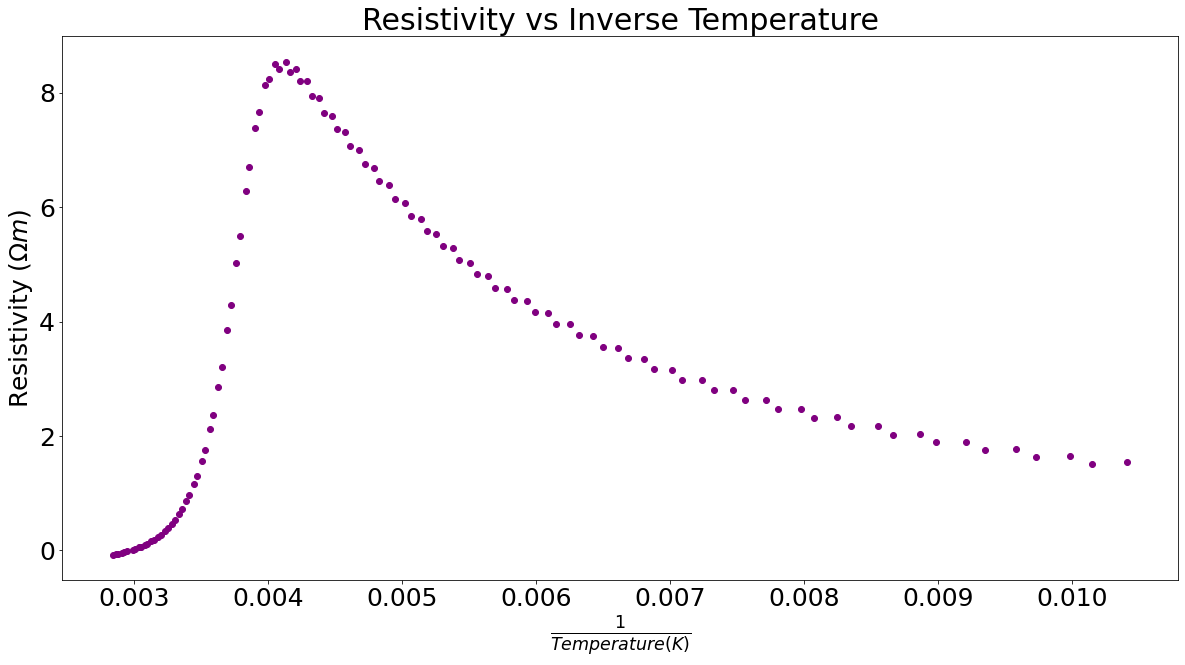

In [24]:

plt.figure(figsize=(20,10))
#plt.errorbar(1/temperature, resistivity,marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/temperature, resistivity, yerr = resistivity_error, marker='o', color = 'purple', linestyle = 'none')

#plt.errorbar(inverse_temperature, resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
#plt.legend(loc='best')
plt.ylabel(r'Resistivity ($\Omega m$)')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Resistivity vs Inverse Temperature')



# Conductivity vs Inverse Temperature

<ipython-input-25-54c494407918>:2: RuntimeWarning: invalid value encountered in log
  plt.errorbar(1/temperature.value, np.log(1/resistivity.value), yerr =resistivity_error.value, marker='o', linestyle = 'none', color = 'purple')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Conductivity vs Inverse Temperature')

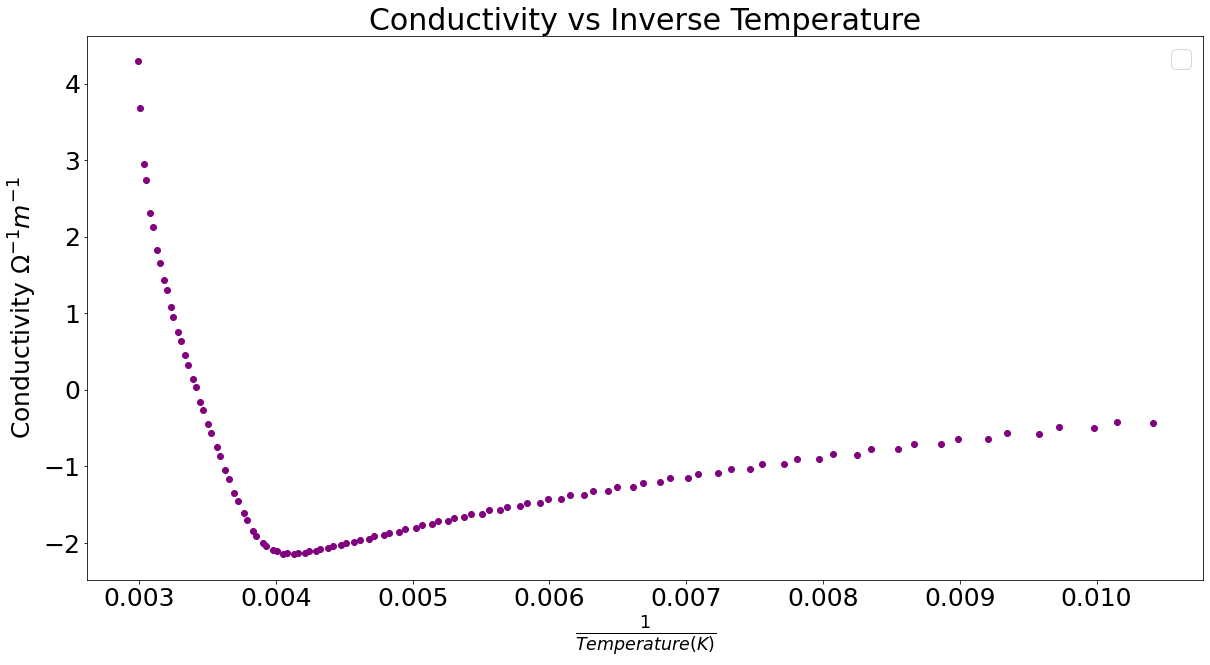

In [25]:
plt.figure(figsize=(20,10))
plt.errorbar(1/temperature.value, np.log(1/resistivity.value), yerr =resistivity_error.value, marker='o', linestyle = 'none', color = 'purple')
#plt.errorbar(inverse_temperature, 1/resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
plt.legend(loc='best')
plt.ylabel(r'Conductivity $\Omega^{-1} m^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Conductivity vs Inverse Temperature')

# Hall Coefficienct vs Inverse Temperature


Text(0.5, 1.0, 'Resistivity vs Inverse Temperature')

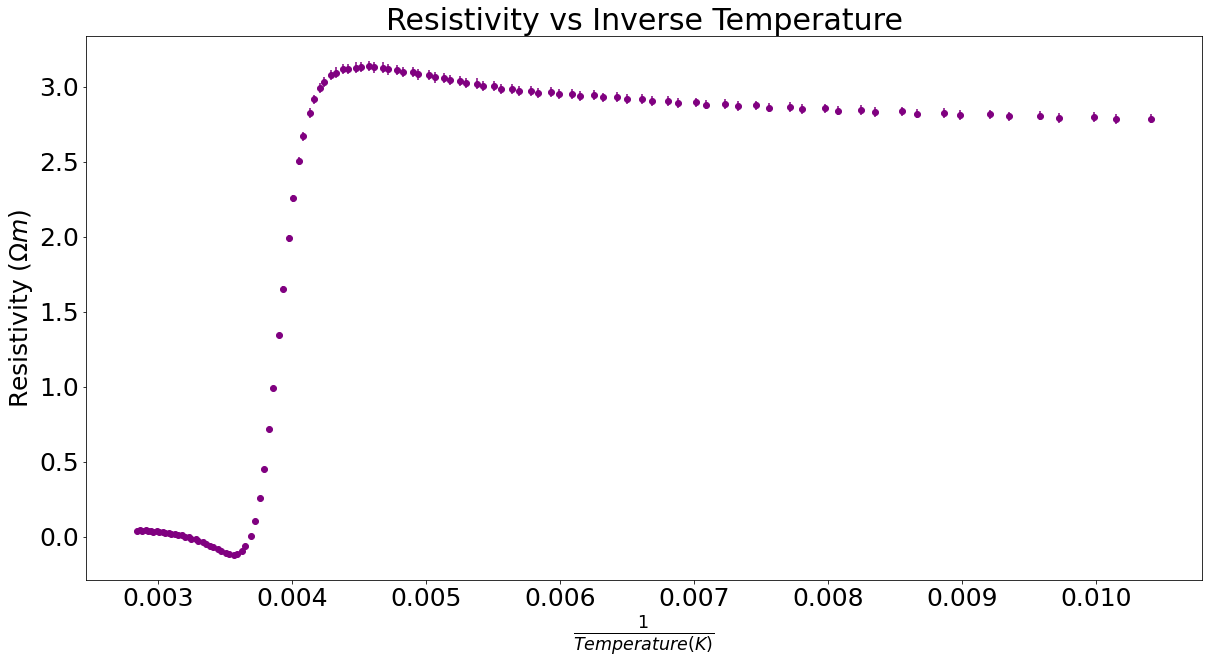

In [26]:

plt.figure(figsize=(20,10))
#plt.errorbar(1/temperature, resistivity,marker='o', linestyle = 'none', label = 'Positive B-Field')
plt.errorbar(1/temperature, rh, rh_error, marker='o', color = 'purple', linestyle = 'none')

#plt.errorbar(inverse_temperature, resistivity_zero, yerr =resistivity_error_zero, marker='o', linestyle = 'none', label = 'Zero B-Field')
#plt.legend(loc='best')
plt.ylabel(r'Resistivity ($\Omega m$)')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Resistivity vs Inverse Temperature')



# Plot (Hall coefficient X conductivity) versus T. Where does Hall coefficient becomes zero

In [27]:
conductivity = 1/resistivity
temp = resistivity_error
conductivity_error = np.sqrt((-conductivity**2*temp)**2)
rhcon = rh * conductivity
rhcon_error = np.sqrt((rhcon*conductivity)**2 + (conductivity_error*rhcon)**2)

max_index = np.where(rhcon_error==np.max(rhcon_error))
rhcon = np.delete(rhcon, max_index)
rhcon_error = np.delete(rhcon_error, max_index)
correct_temp = np.delete(np.array(temperature), max_index)



Text(0.5, 1.0, 'Hall Mobility vs Inverse Temperature')

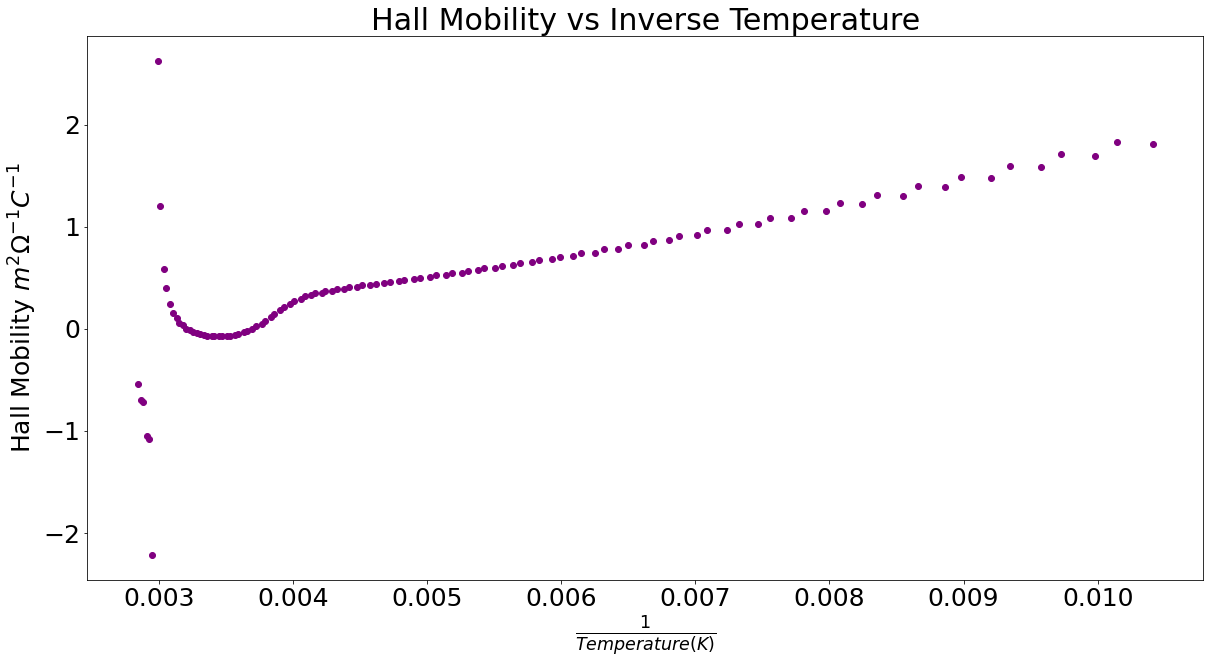

In [28]:
plt.figure(figsize=(20,10))
plt.errorbar(1/correct_temp, rhcon.value, marker='o', linestyle = 'none', color = 'purple')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Mobility vs Inverse Temperature')

# Explain what type of material we have: p-type or n-type. (Why don’t you need to know the direction of the magnetic field after all?)

# Find electron or hole concentrations for the sample versus temperature.

Text(0, 0.5, 'Concentration')

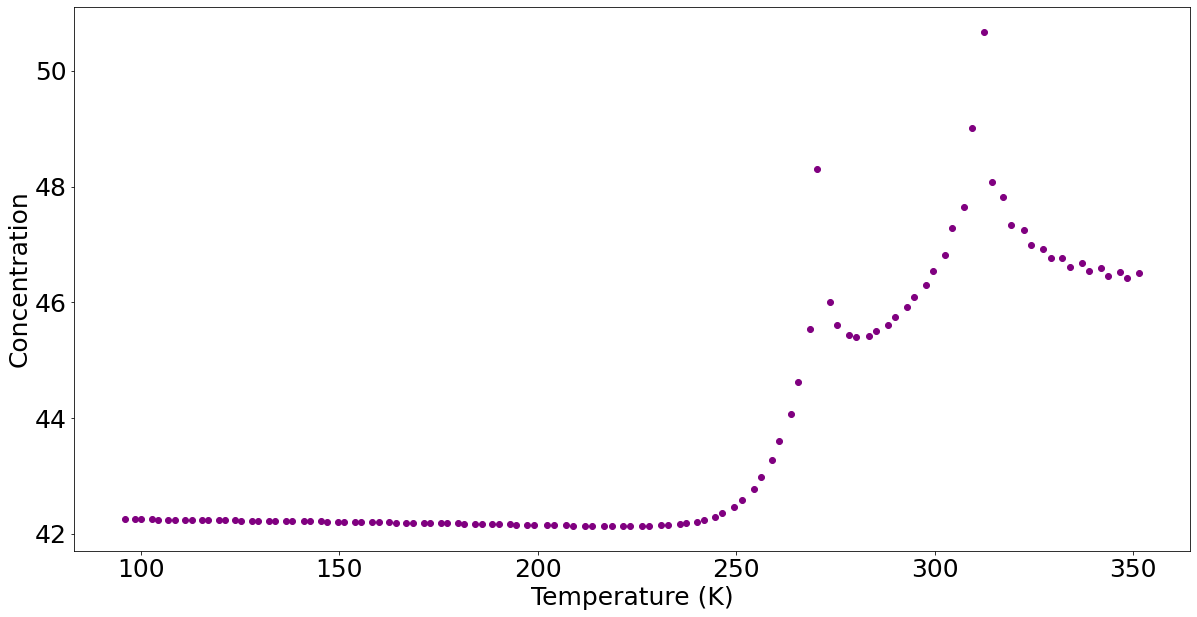

In [29]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.scatter(temperature, np.log(np.abs(concentration.value)), color = 'purple')
plt.xlabel('Temperature (K)')
plt.ylabel('Concentration')

# Find the Hall Coefficient RH and Hall mobility

In [30]:
rh

<Quantity [ 2.78798860e+00,  2.78480237e+00,  2.79997013e+00,
            2.79255609e+00,  2.80785629e+00,  2.80247603e+00,
            2.81671013e+00,  2.81205036e+00,  2.82535047e+00,
            2.82220345e+00,  2.83639626e+00,  2.83291985e+00,
            2.84558504e+00,  2.84223658e+00,  2.85624728e+00,
            2.85153011e+00,  2.86496410e+00,  2.86134603e+00,
            2.87623803e+00,  2.87071600e+00,  2.88419478e+00,
            2.88176708e+00,  2.89609647e+00,  2.89272653e+00,
            2.90748857e+00,  2.90374536e+00,  2.91777820e+00,
            2.91718545e+00,  2.93013665e+00,  2.92943152e+00,
            2.94335512e+00,  2.94021739e+00,  2.95438453e+00,
            2.95036323e+00,  2.96349401e+00,  2.96028191e+00,
            2.97254304e+00,  2.97238309e+00,  2.98700697e+00,
            2.98867981e+00,  3.00483493e+00,  3.00809932e+00,
            3.02206363e+00,  3.02529502e+00,  3.04112631e+00,
            3.04447115e+00,  3.06047025e+00,  3.06278682e+00,
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Hall Coefficient vs Temperature')

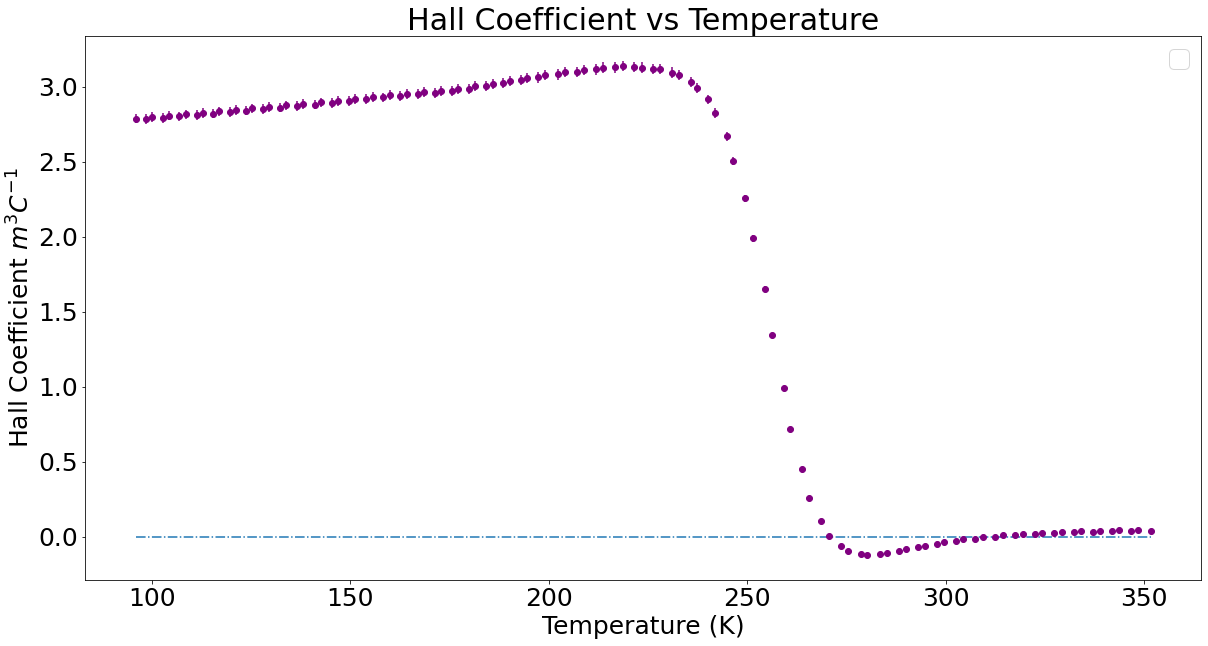

In [32]:
plt.figure(figsize=(20,10))
plt.errorbar(temperature, rh, yerr =rh_error, marker='o', linestyle = 'none', color = 'Purple')
plt.plot(temperature, np.zeros(len(temperature)), '-.')
plt.legend(loc='best')
plt.ylabel(r'Hall Coefficient $m^3 C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Coefficient vs Temperature')

Text(0.5, 1.0, 'Hall Mobility vs Inverse Temperature')

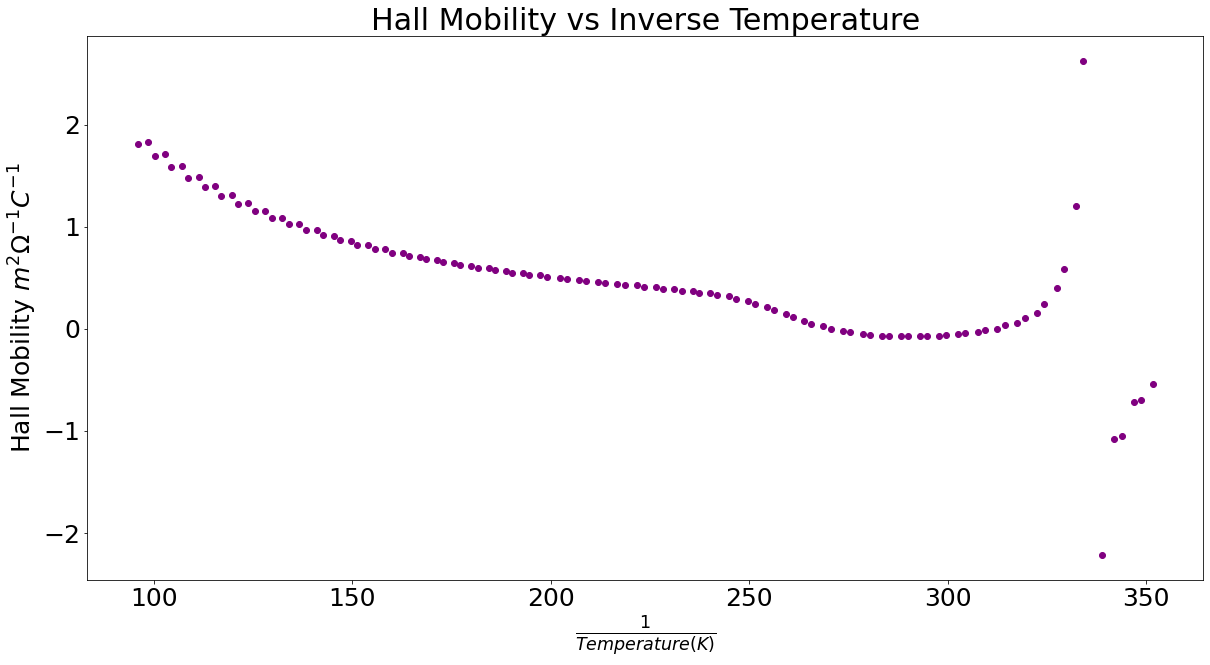

In [33]:
plt.figure(figsize=(20,10))
plt.errorbar(correct_temp, rhcon.value, marker='o', linestyle = 'none', color = 'purple')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'$\frac{1}{Temperature (K)}$')
plt.title('Hall Mobility vs Inverse Temperature')

# Find electron or hole concentration in the extrinsic region see E. Haller Article.


Text(0, 0.5, 'ln(Concentration)')

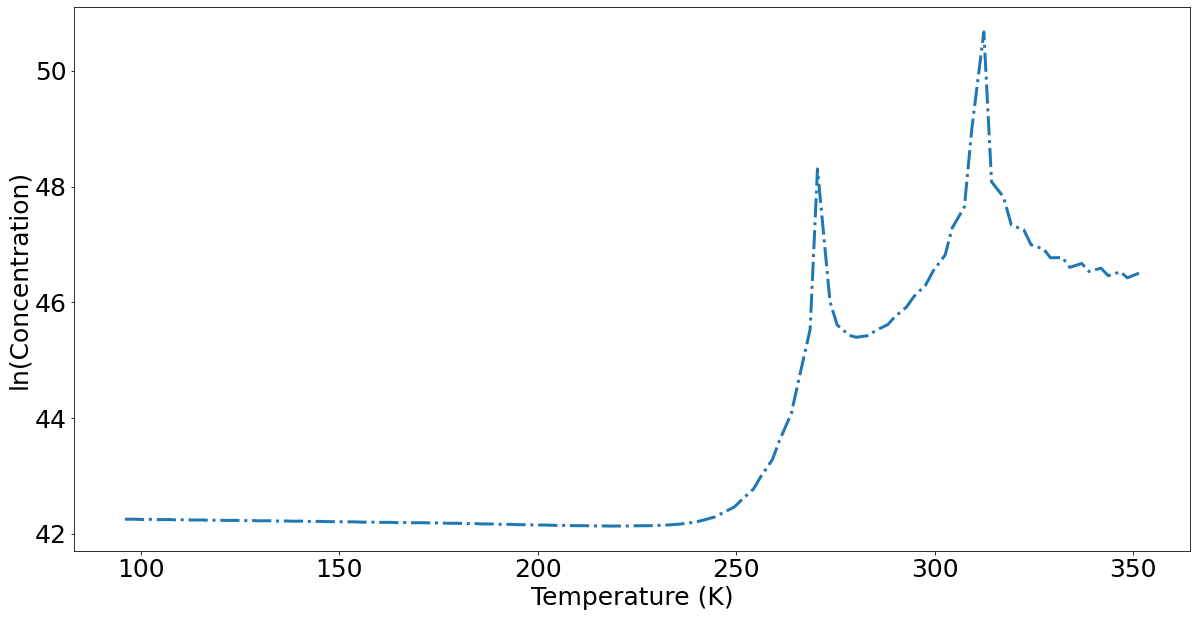

In [34]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
#plt.xlim(95, 250)
#plt.ylim(42.1, 42.250)


(42.1, 42.25)

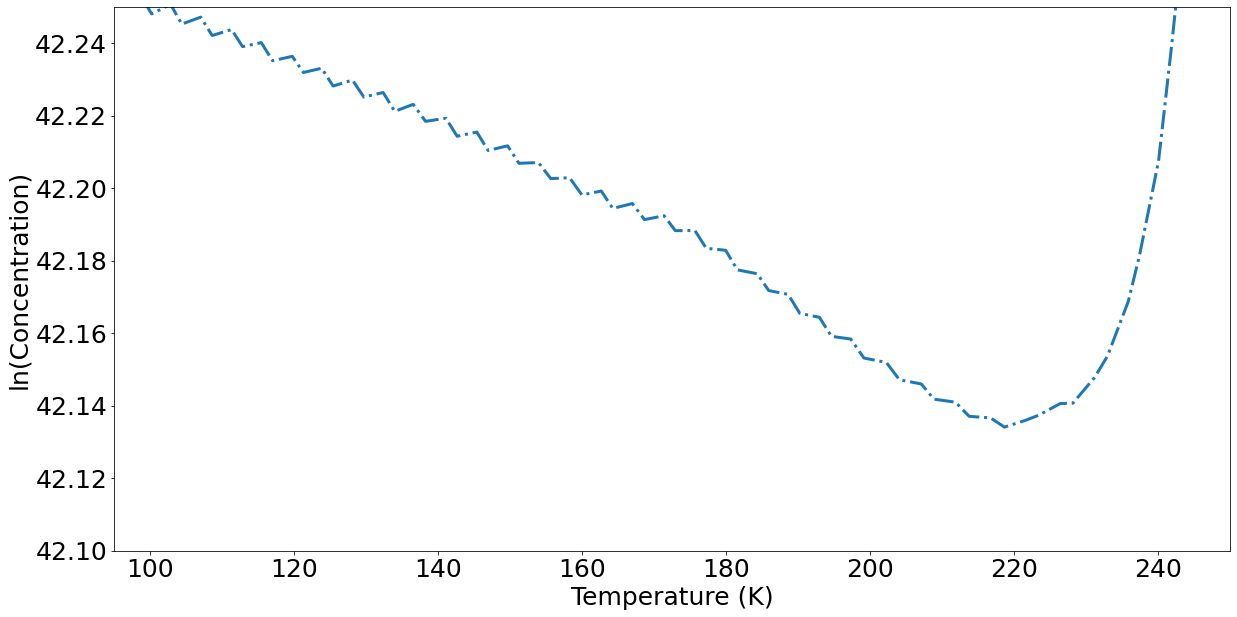

In [35]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(95, 250)
plt.ylim(42.1, 42.250)


(41.0, 43.0)

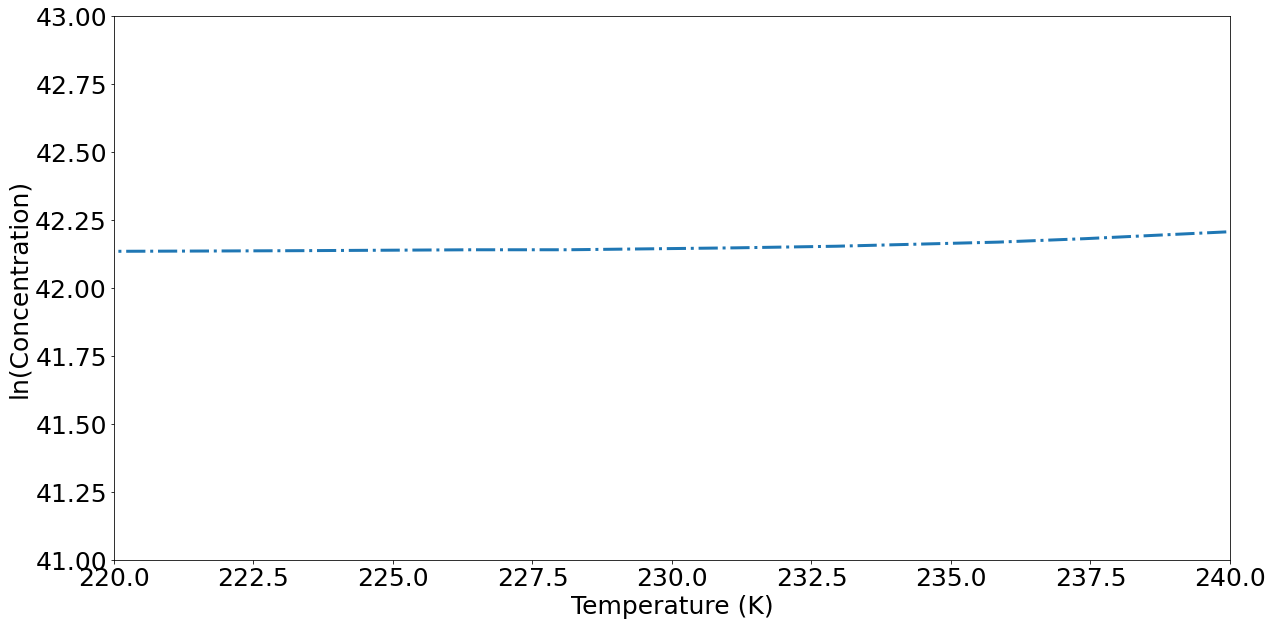

In [36]:

plt.figure(figsize=(20,10))
concentration = 1/(rh*const.e.value * u.C)
#max_index = np.where(np.abs(concentration) == np.max(np.abs(concentration)))
#concentration = np.delete(concentration, max_index)

#temp_modified = np.delete(np.array(inverse_temperature), max_index)
plt.plot(temperature, np.log(np.abs(concentration.value)), '-.', linewidth=3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'ln(Concentration)')
plt.xlim(220, 240)
plt.ylim(41, 43)


# Find electron and hole mobilities in the extrinsic region.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.3, 0.5)

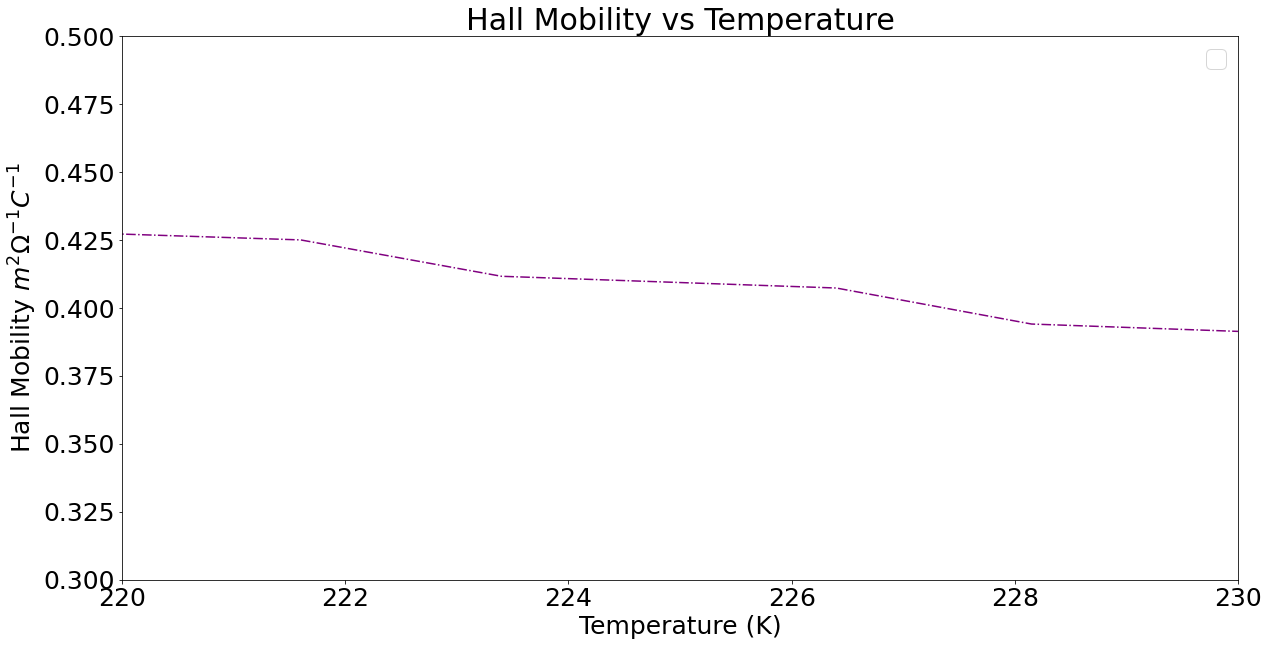

In [37]:
plt.figure(figsize=(20,10))
plt.plot(correct_temp, rhcon.value, '-.', color = 'purple')
plt.legend(loc='best')
plt.ylabel(r'Hall Mobility $m^2 \Omega^{-1} C^{-1}$')
plt.xlabel(r'Temperature (K)')
plt.title('Hall Mobility vs Temperature')
plt.xlim(220, 230)
plt.ylim(0.3,.5)

# Compare the resistance measured for the sample (at zero field) with the magnetoresistance (the resistance measured while the magnetic field is on).


In [38]:
dataframe_pos = dataframe[dataframe['B-Field (Gauss)']>40]
dataframe_neg = dataframe[dataframe['B-Field (Gauss)']<-40]
dataframe_zero = dataframe[dataframe['B-Field (Gauss)']>-40]
dataframe_zero = dataframe_zero[dataframe_zero['B-Field (Gauss)']<40]

In [39]:
def cosh_function(x):
    series = []
    for i in x:
        if i>=0:            
            series.append(1/np.cosh(np.log(i.value)/2.403))
        else: 
            series.append(1/np.cosh(np.log(np.abs(i.value))/2.403))

    return series

index = dataframe_pos
tpos = index['Temperature (K)']
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm

trans_resistance_pos = (racbd+rbdac)/2


index = dataframe_zero
tzero = index['Temperature (K)']
voltage_error = 10e-6 * u.V #Burden voltage
current_error = 10e-6 * u.A
magnetic_field = np.array(index['B-Field (Gauss)'] )* u.G
magnetic_field_error = -35.540001 * u.G

racbd = np.array(index['Voltage BD']/index['sample I AC']) * u.Ohm 
racbd_error = np.array(np.sqrt((voltage_error.value/index['sample I AC'])**2 + (current_error.value/index['Voltage BD'])**2) )* u.Ohm

rbdac = np.array(index['Voltage AC']/index['sample I BD'] )* u.Ohm
rbdac_error = np.array(np.sqrt((voltage_error.value/index['sample I BD'])**2 + (current_error.value/index['Voltage AC'])**2)) * u.Ohm

trans_resistance_zero = (racbd+rbdac)/2



Text(0.5, 1.0, 'Resistance at Different B-Fields')

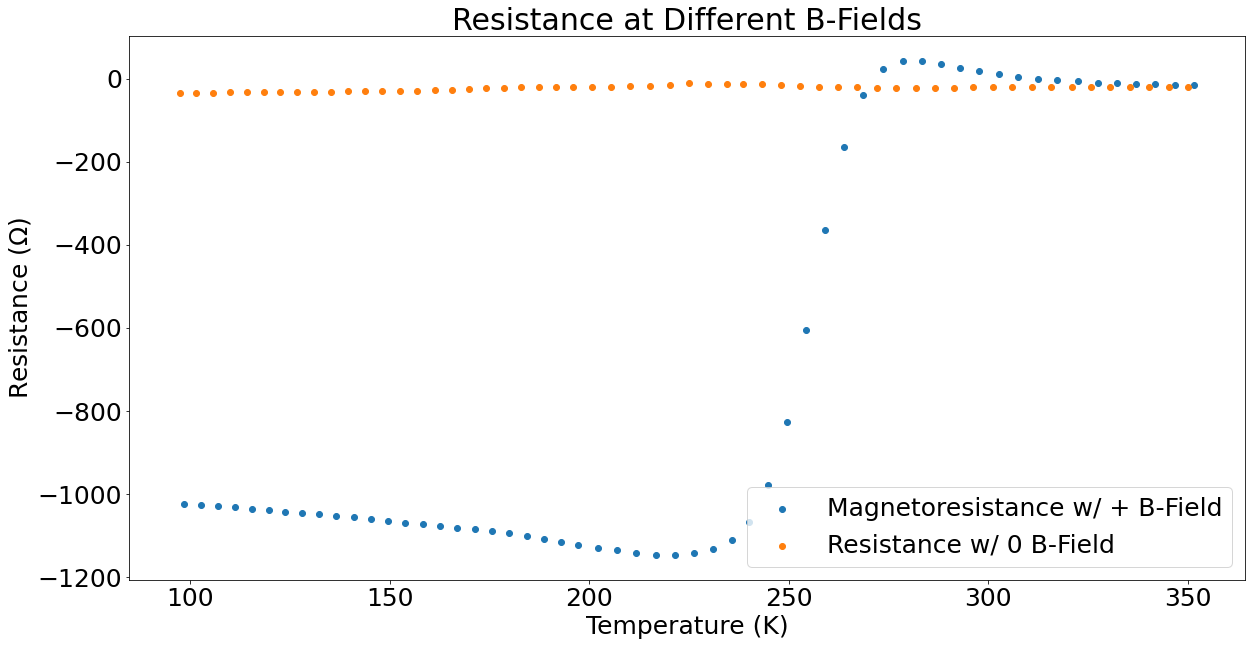

In [40]:
plt.figure(figsize=(20,10))
plt.scatter(tpos, trans_resistance_pos, label = 'Magnetoresistance w/ + B-Field')
plt.scatter(tzero, trans_resistance_zero, label = 'Resistance w/ 0 B-Field')
plt.legend(loc='lower right')
plt.ylabel(r'Resistance ($\Omega$)')
plt.xlabel(r'Temperature (K)')
plt.title(r'Resistance at Different B-Fields')
